**Import the necessary libraries for the project**

In [1]:
import requests
import json
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import os

**Use the get method to request the Time Series Daily API from AlphaVantage with my API Key, and assign it to the variable "SNP." This shows the daily data over the past 20 years for the SPY Exchange Traded Fund, which tracks the S&P 500. Status Code 200 means everything is OK and the connection is successful.**

In [2]:
API_Key = os.getenv('API_Key')

url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=SPY&outputsize=full&apikey={API_Key}'

SNP = requests.get(url)
SNP

<Response [200]>

**Pull the data from the API and store it in the "SNP_data" variable in the text format**

In [3]:
SNP_data = SNP.text
SNP_data

'{\n    "Information": "Thank you for using Alpha Vantage! This is a premium endpoint. You may subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly unlock all premium endpoints"\n}'

**Convert the text into a json format, parsing it through json using the loads method and then save it to the variable "SNPjson". When you parse json, you convert a string containing a json document into a structured data object that you can operate on. Then, print the data in json format**

In [4]:
SNPjson = json.loads(SNP_data)
print(SNPjson)

{'Information': 'Thank you for using Alpha Vantage! This is a premium endpoint. You may subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly unlock all premium endpoints'}


**Print the entire DataFrame, saving it to the variable "SNP_df"**

In [5]:
SNP_df = pd.DataFrame(SNPjson)
SNP_df

ValueError: If using all scalar values, you must pass an index

**Set Index to a Column in the DataFrame, so the dates can be used as part of the data. This is done using the reset_index method.**

In [ ]:
SNP_df.reset_index(inplace=True)
SNP_df.head()

,index,Meta Data,Time Series (Daily)
0,1. Information,"Daily Prices (open, high, low, close) and Volumes",NaN
1,2. Symbol,SPY,NaN
2,3. Last Refreshed,2022-11-02,NaN
3,4. Output Size,Full size,NaN
4,5. Time Zone,US/Eastern,NaN


**Use the drop method to drop the Meta Data Column**

In [ ]:
SNP_df = SNP_df.drop(labels='Meta Data', axis=1)
SNP_df.head()

,index,Time Series (Daily)
0,1. Information,NaN
1,2. Symbol,NaN
2,3. Last Refreshed,NaN
3,4. Output Size,NaN
4,5. Time Zone,NaN


**Rename the remaining Columns Date and Daily**

In [ ]:
SNP_df.columns = ['Date', 'Daily']
SNP_df.head()

,Date,Daily
0,1. Information,NaN
1,2. Symbol,NaN
2,3. Last Refreshed,NaN
3,4. Output Size,NaN
4,5. Time Zone,NaN


**Remove the first 5 unnecessary Rows from the DataFrame using the iloc function**

In [ ]:
SNP_df = SNP_df.iloc[5:]
SNP_df.head()

,Date,Daily
5,2022-11-02,"{'1. open': '383.9000', '2. high': '388.6300',..."
6,2022-11-01,"{'1. open': '390.1400', '2. high': '390.3900',..."
7,2022-10-31,"{'1. open': '386.4400', '2. high': '388.4000',..."
8,2022-10-28,"{'1. open': '379.8700', '2. high': '389.5200',..."
9,2022-10-27,"{'1. open': '383.0700', '2. high': '385.0000',..."


**The Daily column is made up of Dictionary values, so I need to take the keys and create a column out of each, then drop the Daily Column.**

In [ ]:
SNP_df = pd.concat([SNP_df.drop(['Daily'], axis=1), SNP_df['Daily'].apply(pd.Series)], axis=1)
SNP_df.head()

,Date,1. open,2. high,3. low,4. close,5. volume
5,2022-11-02,383.9000,388.6300,374.7600,374.8700,126990356
6,2022-11-01,390.1400,390.3900,383.2900,384.5200,85407598
7,2022-10-31,386.4400,388.4000,385.2600,386.2100,96631258
8,2022-10-28,379.8700,389.5200,379.6800,389.0200,100301958
9,2022-10-27,383.0700,385.0000,379.3300,379.9800,81971756


**Rename all of the columns to make the DataFrame more attractive**

In [ ]:
SNP_df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
SNP_df.head()

,Date,Open,High,Low,Close,Volume
5,2022-11-02,383.9000,388.6300,374.7600,374.8700,126990356
6,2022-11-01,390.1400,390.3900,383.2900,384.5200,85407598
7,2022-10-31,386.4400,388.4000,385.2600,386.2100,96631258
8,2022-10-28,379.8700,389.5200,379.6800,389.0200,100301958
9,2022-10-27,383.0700,385.0000,379.3300,379.9800,81971756


**Drop the columns that will not be visualized on the Line Chart**

In [ ]:
SNP_df = SNP_df.drop(['Open', 'High', 'Low', 'Volume'], axis=1)
SNP_df

,Date,Close
5,2022-11-02,374.8700
6,2022-11-01,384.5200
7,2022-10-31,386.2100
8,2022-10-28,389.0200
9,2022-10-27,379.9800
...,...,...
5790,1999-11-05,137.8750
5791,1999-11-04,136.5312
5792,1999-11-03,135.5000
5793,1999-11-02,134.5937


**Change the data type of the Close column from String to Float, and change the data type of the Date column to Datetime, since they are the data we will be plotting**

In [ ]:
SNP_df.Close = SNP_df.Close.astype(float)
SNP_df['Date'] = pd.to_datetime(SNP_df['Date'])
SNP_df.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

**Filter the dataset to show the dates from the beginning to the end of the 2008 Housing Crash. The datasets will be sorted so that the dates go from earliest to most recent**

In [ ]:
SPY2008 = SNP_df[(SNP_df['Date'] > '2007-10-09') & (SNP_df['Date'] < '2009-03-10')]
SPY2008 = SPY2008.sort_index(axis=0, ascending=False)
SPY2008

,Date,Close
3798,2007-10-10,156.22
3797,2007-10-11,155.47
3796,2007-10-12,156.33
3795,2007-10-15,155.01
3794,2007-10-16,153.78
...,...,...
3448,2009-03-03,70.07
3447,2009-03-04,71.73
3446,2009-03-05,68.80
3445,2009-03-06,68.92


**Filter the dataset to show the dates from the beginning to the end of the Covid Market Crash**

In [ ]:
SPY2020 = SNP_df[(SNP_df['Date'] > '2020-02-19') & (SNP_df['Date'] < '2020-03-24')]
SPY2020 = SPY2020.sort_index(axis=0, ascending=False)
SPY2020

,Date,Close
687,2020-02-20,336.95
686,2020-02-21,333.48
685,2020-02-24,322.42
684,2020-02-25,312.65
683,2020-02-26,311.50
682,2020-02-27,297.51
681,2020-02-28,296.26
680,2020-03-02,309.09
679,2020-03-03,300.24
678,2020-03-04,312.86


**Filter the dataset to show the dates of the current Stock Market downturn**

In [ ]:
SPY2022 = SNP_df[(SNP_df['Date'] > '2022-01-03') & (SNP_df['Date'] < '2022-10-22')]
SPY2022 = SPY2022.sort_index(axis=0, ascending=False)
SPY2022

,Date,Close
214,2022-01-04,477.55
213,2022-01-05,468.38
212,2022-01-06,467.94
211,2022-01-07,466.09
210,2022-01-10,465.51
...,...,...
17,2022-10-17,366.82
16,2022-10-18,371.13
15,2022-10-19,368.50
14,2022-10-20,365.41


**Create a Lineplot with Seaborn to visualize the drop in daily closing price of the SPY ETF, which follow the S&P 500, during the 2008 Housing Crash**

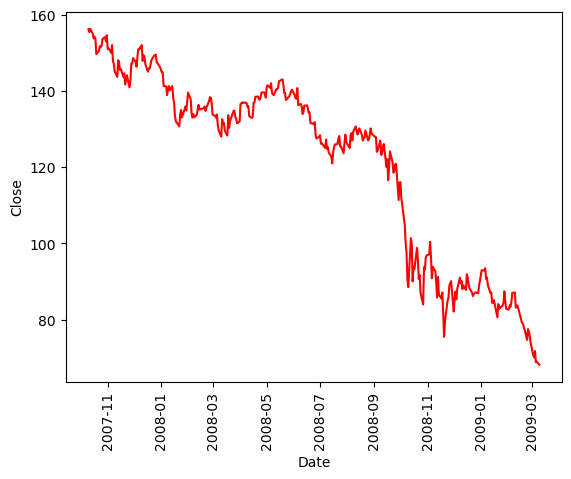

In [ ]:
sns.lineplot(data=SPY2008, x='Date', y='Close', style_order='whitegrid', color='r')
plt.xticks(rotation=90)
plt.show()

**Create a Lineplot with Seaborn to visualize the drop in daily closing price of the SPY ETF during the 2020 Covid Pandemic market**

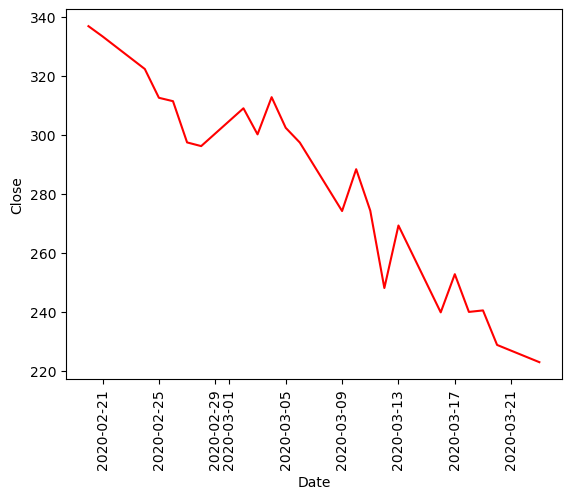

In [ ]:
sns.lineplot(data=SPY2020, x='Date', y='Close', style_order='whitegrid', color='r')
plt.xticks(rotation=90)
plt.show()

**Create a Lineplot with Seaborn to visualize the drop in daily closing price of the SPY ETF during the current market downturn**

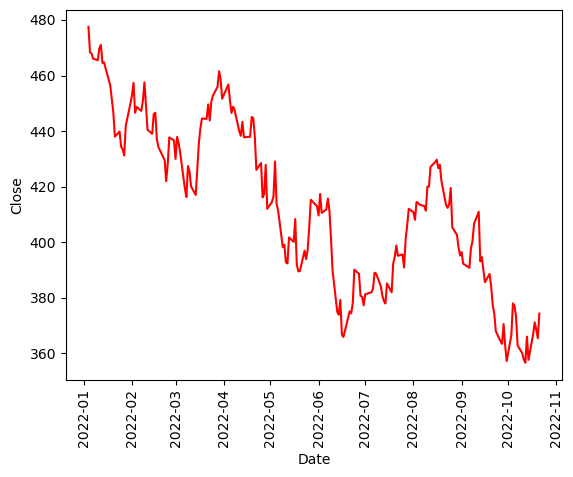

In [ ]:
sns.lineplot(data=SPY2022, x='Date', y='Close', style_order='whitegrid', color='r')
plt.xticks(rotation=90)
plt.show()

**Use the get method to request the Time Series Daily API from AlphaVantage with my API Key, and assign it to the variable "TLT." This shows the daily data over the past 20 years for the TLT Exchange Traded Fund, which tracks Long-Term Treasuries. Status Code 200 means everything is OK and the connection is successful.**

In [ ]:
API_Key = os.getenv('API_Key')

url2 = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=TLT&outputsize=full&apikey={API_Key}'

TLT = requests.get(url2)
TLT

<Response [200]>

**Pull the data from the API and store it in the "TLT_data" variable in the text format**

In [ ]:
TLT_data = TLT.text
TLT_data

'{\n    "Meta Data": {\n        "1. Information": "Daily Prices (open, high, low, close) and Volumes",\n        "2. Symbol": "TLT",\n        "3. Last Refreshed": "2022-11-02",\n        "4. Output Size": "Full size",\n        "5. Time Zone": "US/Eastern"\n    },\n    "Time Series (Daily)": {\n        "2022-11-02": {\n            "1. open": "96.9100",\n            "2. high": "97.6300",\n            "3. low": "95.9600",\n            "4. close": "96.3500",\n            "5. volume": "25010515"\n        },\n        "2022-11-01": {\n            "1. open": "97.3800",\n            "2. high": "97.4200",\n            "3. low": "96.2100",\n            "4. close": "96.7700",\n            "5. volume": "17585088"\n        },\n        "2022-10-31": {\n            "1. open": "96.3600",\n            "2. high": "96.6200",\n            "3. low": "95.0300",\n            "4. close": "96.1100",\n            "5. volume": "23956687"\n        },\n        "2022-10-28": {\n            "1. open": "96.8600",\n     

**Convert the text into a json format, parsing it through json using the loads method and then save it to the variable "TLTjson". Then, print the data in json format**

In [ ]:
TLTjson = json.loads(TLT_data)
print(TLTjson)

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'TLT', '3. Last Refreshed': '2022-11-02', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2022-11-02': {'1. open': '96.9100', '2. high': '97.6300', '3. low': '95.9600', '4. close': '96.3500', '5. volume': '25010515'}, '2022-11-01': {'1. open': '97.3800', '2. high': '97.4200', '3. low': '96.2100', '4. close': '96.7700', '5. volume': '17585088'}, '2022-10-31': {'1. open': '96.3600', '2. high': '96.6200', '3. low': '95.0300', '4. close': '96.1100', '5. volume': '23956687'}, '2022-10-28': {'1. open': '96.8600', '2. high': '97.6250', '3. low': '96.4100', '4. close': '96.8000', '5. volume': '22244089'}, '2022-10-27': {'1. open': '96.9800', '2. high': '97.9000', '3. low': '96.2150', '4. close': '97.4700', '5. volume': '20270036'}, '2022-10-26': {'1. open': '95.7700', '2. high': '96.6900', '3. low': '95.7650', '4. close': '96.4600', '5. volume': '24854742'},

**Print the entire DataFrame, saving it to the variable "TLT_df"**

In [ ]:
TLT_df = pd.DataFrame(TLTjson)
TLT_df

,Meta Data,Time Series (Daily)
1. Information,"Daily Prices (open, high, low, close) and Volumes",NaN
2. Symbol,TLT,NaN
3. Last Refreshed,2022-11-02,NaN
4. Output Size,Full size,NaN
5. Time Zone,US/Eastern,NaN
...,...,...
2002-08-01,NaN,"{'1. open': '82.5400', '2. high': '83.0200', '..."
2002-07-31,NaN,"{'1. open': '81.9500', '2. high': '82.8000', '..."
2002-07-30,NaN,"{'1. open': '81.7500', '2. high': '81.9000', '..."
2002-07-29,NaN,"{'1. open': '82.0600', '2. high': '82.1600', '..."


**Set Index to a Column in the DataFrame, so the dates can be used as part of the data. This is done using the reset_index method.**

In [ ]:
TLT_df.reset_index(inplace=True)
TLT_df.head()

,index,Meta Data,Time Series (Daily)
0,1. Information,"Daily Prices (open, high, low, close) and Volumes",NaN
1,2. Symbol,TLT,NaN
2,3. Last Refreshed,2022-11-02,NaN
3,4. Output Size,Full size,NaN
4,5. Time Zone,US/Eastern,NaN


**Use the drop method to drop the Meta Data Column**

In [ ]:
TLT_df = TLT_df.drop(labels='Meta Data', axis=1)
TLT_df.head()

,index,Time Series (Daily)
0,1. Information,NaN
1,2. Symbol,NaN
2,3. Last Refreshed,NaN
3,4. Output Size,NaN
4,5. Time Zone,NaN


**Rename the remaining Columns Date and Daily**

In [ ]:
TLT_df.columns = ['Date', 'Daily']
TLT_df.head()

,Date,Daily
0,1. Information,NaN
1,2. Symbol,NaN
2,3. Last Refreshed,NaN
3,4. Output Size,NaN
4,5. Time Zone,NaN


**Remove the first 5 unnecessary Rows from the DataFrame using the iloc function**

In [ ]:
TLT_df = TLT_df.iloc[5:]
TLT_df.head()

,Date,Daily
5,2022-11-02,"{'1. open': '96.9100', '2. high': '97.6300', '..."
6,2022-11-01,"{'1. open': '97.3800', '2. high': '97.4200', '..."
7,2022-10-31,"{'1. open': '96.3600', '2. high': '96.6200', '..."
8,2022-10-28,"{'1. open': '96.8600', '2. high': '97.6250', '..."
9,2022-10-27,"{'1. open': '96.9800', '2. high': '97.9000', '..."


**The Daily column is made up of Dictionary values, so I need to take the keys and create a column out of each, then drop the Daily Column.**

In [ ]:
TLT_df = pd.concat([TLT_df.drop(['Daily'], axis=1), TLT_df['Daily'].apply(pd.Series)], axis=1)
TLT_df.head()

,Date,1. open,2. high,3. low,4. close,5. volume
5,2022-11-02,96.9100,97.6300,95.9600,96.3500,25010515
6,2022-11-01,97.3800,97.4200,96.2100,96.7700,17585088
7,2022-10-31,96.3600,96.6200,95.0300,96.1100,23956687
8,2022-10-28,96.8600,97.6250,96.4100,96.8000,22244089
9,2022-10-27,96.9800,97.9000,96.2150,97.4700,20270036


**Rename all of the columns to make the DataFrame more attractive**

In [ ]:
TLT_df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
TLT_df.head()

,Date,Open,High,Low,Close,Volume
5,2022-11-02,96.9100,97.6300,95.9600,96.3500,25010515
6,2022-11-01,97.3800,97.4200,96.2100,96.7700,17585088
7,2022-10-31,96.3600,96.6200,95.0300,96.1100,23956687
8,2022-10-28,96.8600,97.6250,96.4100,96.8000,22244089
9,2022-10-27,96.9800,97.9000,96.2150,97.4700,20270036


**Change the data type of the Close column from String to Float, and change the data type of the Date column to Datetime, since they are the data we will be plotting**

In [ ]:
TLT_df = TLT_df.drop(['Open', 'High', 'Low', 'Volume'], axis=1)
TLT_df

,Date,Close
5,2022-11-02,96.3500
6,2022-11-01,96.7700
7,2022-10-31,96.1100
8,2022-10-28,96.8000
9,2022-10-27,97.4700
...,...,...
5105,2002-08-01,83.0000
5106,2002-07-31,82.5300
5107,2002-07-30,81.5200
5108,2002-07-29,81.4200


**Change the data type of the Close column from String to Float, and change the data type of the Date column to Datetime, since they are the data we will be plotting**

In [ ]:
TLT_df.Close = TLT_df.Close.astype(float)
TLT_df['Date'] = pd.to_datetime(TLT_df['Date'])
TLT_df.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

**Filter the dataset to show the dates from the beginning to the end of the 2008 Housing Crash. The datasets will be sorted so that the dates go from earliest to most recent**

In [ ]:
TLT2008 = TLT_df[(TLT_df['Date'] > '2007-10-09') & (TLT_df['Date'] < '2009-03-10')]
TLT2008 = TLT2008.sort_index(axis=0, ascending=False)
TLT2008

,Date,Close
3798,2007-10-10,88.15
3797,2007-10-11,88.06
3796,2007-10-12,87.63
3795,2007-10-15,87.65
3794,2007-10-16,87.68
...,...,...
3448,2009-03-03,102.59
3447,2009-03-04,102.12
3446,2009-03-05,104.96
3445,2009-03-06,104.26


**Filter the dataset to show the dates from the beginning to the end of the Covid Market Crash**

In [ ]:
TLT2020 = TLT_df[(SNP_df['Date'] > '2020-02-19') & (TLT_df['Date'] < '2020-03-24')]
TLT2020 = TLT2020.sort_index(axis=0, ascending=False)
TLT2020

C:\Users\mrnal\AppData\Local\Temp\ipykernel_22536\223499256.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TLT2020 = TLT_df[(SNP_df['Date'] > '2020-02-19') & (TLT_df['Date'] < '2020-03-24')]


,Date,Close
687,2020-02-20,146.67
686,2020-02-21,148.04
685,2020-02-24,150.25
684,2020-02-25,151.05
683,2020-02-26,150.25
682,2020-02-27,151.88
681,2020-02-28,155.31
680,2020-03-02,153.94
679,2020-03-03,156.33
678,2020-03-04,154.67


**Filter the dataset to show the dates of the current Stock Market downturn**

In [ ]:
TLT2022 = TLT_df[(TLT_df['Date'] > '2022-01-03') & (TLT_df['Date'] < '2022-10-22')]
TLT2022 = TLT2022.sort_index(axis=0, ascending=False)
TLT2022

,Date,Close
214,2022-01-04,143.70
213,2022-01-05,142.92
212,2022-01-06,143.29
211,2022-01-07,142.26
210,2022-01-10,142.61
...,...,...
17,2022-10-17,98.09
16,2022-10-18,98.32
15,2022-10-19,96.53
14,2022-10-20,94.88


**Create a Lineplot with Seaborn to visualize the drop in daily closing price of the TLT ETF, which follow Long-Term Treasuries, during the 2008 Housing Crash**

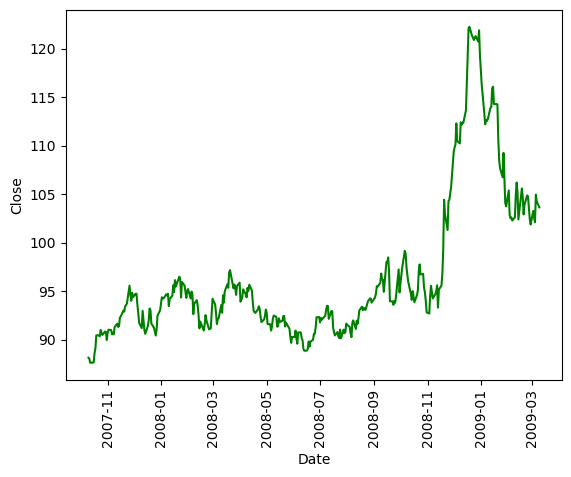

In [ ]:
sns.lineplot(data=TLT2008, x='Date', y='Close', style_order='whitegrid', color='g')
plt.xticks(rotation=90)
plt.show()

**Create a Lineplot with Seaborn to visualize the drop in daily closing price of the TLT ETF during the 2020 Covid Pandemic market**

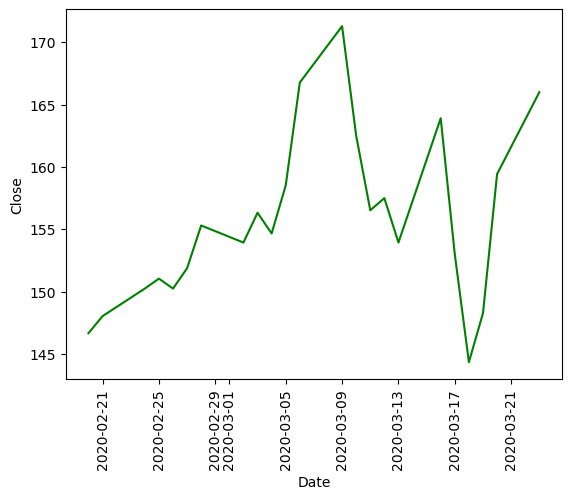

In [ ]:
sns.lineplot(data=TLT2020, x='Date', y='Close', style_order='whitegrid', color='g')
plt.xticks(rotation=90)
plt.show()

**Create a Lineplot with Seaborn to visualize the drop in daily closing price of the TLT ETF during the current market downturn**

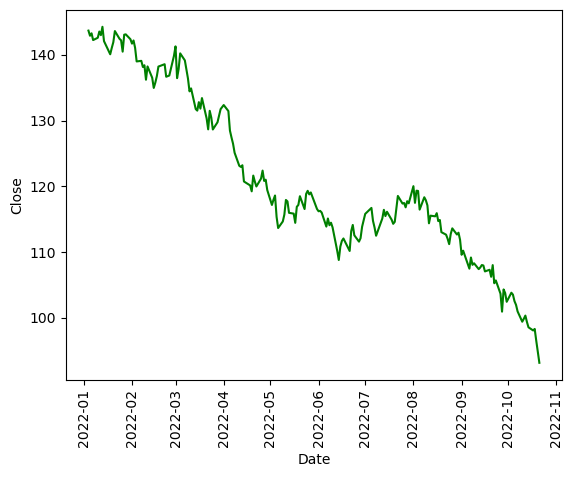

In [ ]:
sns.lineplot(data=TLT2022, x='Date', y='Close', style_order='whitegrid', color='g')
plt.xticks(rotation=90)
plt.show()

**Merge the datasets specifying an Outer Join of SPY and TLT during the 2008 Housing Market Crash to create a new dataset saved to the variable Market2008**

In [ ]:
Market2008 = pd.merge(SPY2008, TLT2008, how="outer", on=['Date'])
Market2008.head()

,Date,Close_x,Close_y
0,2007-10-10,156.22,88.15
1,2007-10-11,155.47,88.06
2,2007-10-12,156.33,87.63
3,2007-10-15,155.01,87.65
4,2007-10-16,153.78,87.68


**Rename the column holding the SPY ETF data as S&P500 and the column holding the TLT ETF data as Treasuries**

In [ ]:
Market2008.columns = ['Date', 'S&P 500', 'Treasuries']
Market2008.head()

,Date,S&P 500,Treasuries
0,2007-10-10,156.22,88.15
1,2007-10-11,155.47,88.06
2,2007-10-12,156.33,87.63
3,2007-10-15,155.01,87.65
4,2007-10-16,153.78,87.68


**Merge the datasets specifying an Outer Join of SPY and TLT during the 2020 Covid Pandemic market drop to create a new dataset saved to the variable Market2020**

In [ ]:
Market2020 = pd.merge(SPY2020, TLT2020, how="outer", on=['Date'])
Market2020.head()

,Date,Close_x,Close_y
0,2020-02-20,336.95,146.67
1,2020-02-21,333.48,148.04
2,2020-02-24,322.42,150.25
3,2020-02-25,312.65,151.05
4,2020-02-26,311.50,150.25


**Rename the column holding the SPY ETF data as S&P500 and the column holding the TLT ETF data as Treasuries**

In [ ]:
Market2020.columns = ['Date', 'S&P 500', 'Treasuries']
Market2020.head()

,Date,S&P 500,Treasuries
0,2020-02-20,336.95,146.67
1,2020-02-21,333.48,148.04
2,2020-02-24,322.42,150.25
3,2020-02-25,312.65,151.05
4,2020-02-26,311.50,150.25


**Merge the datasets specifying an Outer Join of SPY and TLT during the current Market drop to create a new dataset saved to the variable Market2022**

In [ ]:
Market2022 = pd.merge(SPY2022, TLT2022, how="outer", on=['Date'])
Market2022.head()

,Date,Close_x,Close_y
0,2022-01-04,477.55,143.70
1,2022-01-05,468.38,142.92
2,2022-01-06,467.94,143.29
3,2022-01-07,466.09,142.26
4,2022-01-10,465.51,142.61


**Rename the column holding the SPY ETF data as S&P500 and the column holding the TLT ETF data as Treasuries**

In [ ]:
Market2022.columns = ['Date', 'S&P 500', 'Treasuries']
Market2022.head()

,Date,S&P 500,Treasuries
0,2022-01-04,477.55,143.70
1,2022-01-05,468.38,142.92
2,2022-01-06,467.94,143.29
3,2022-01-07,466.09,142.26
4,2022-01-10,465.51,142.61


**Use Mix-Max Scaling to Normalized the Data, so that the 2008 S&P data and Treasuries data can be plotted in the same area**

In [ ]:
Market2008['S&P 500'] = (Market2008['S&P 500'] - Market2008['S&P 500'].min()) / (Market2008['S&P 500'].max() - Market2008['S&P 500'].min())
Market2008['Treasuries'] = (Market2008['Treasuries'] - Market2008['Treasuries'].min()) / (Market2008['Treasuries'].max() - Market2008['Treasuries'].min())
Market2008.head()

,Date,S&P 500,Treasuries
0,2007-10-10,0.998753,0.015016
1,2007-10-11,0.990252,0.012417
2,2007-10-12,1.000000,0.000000
3,2007-10-15,0.985037,0.000578
4,2007-10-16,0.971095,0.001444


**Plot the normalized data so 2008 S&P 500 and Treasuries can be compared visually**

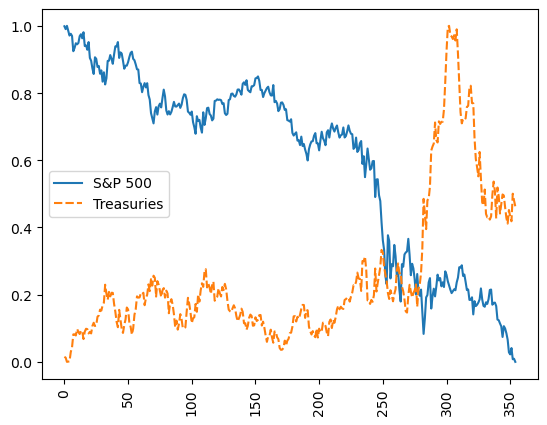

In [ ]:
sns.lineplot(data=Market2008)
plt.xticks(rotation=90)
plt.show()

**Use Mix-Max Scaling to Normalized the Data, so that the 2020 S&P data and Treasuries data can be plotted in the same area**

In [ ]:
Market2020['S&P 500'] = (Market2020['S&P 500'] - Market2020['S&P 500'].min()) / (Market2020['S&P 500'].max() - Market2020['S&P 500'].min())
Market2020['Treasuries'] = (Market2020['Treasuries'] - Market2020['Treasuries'].min()) / (Market2020['Treasuries'].max() - Market2020['Treasuries'].min())
Market2020.head()

,Date,S&P 500,Treasuries
0,2020-02-20,1.000000,0.086117
1,2020-02-21,0.969561,0.136971
2,2020-02-24,0.872544,0.219005
3,2020-02-25,0.786842,0.248701
4,2020-02-26,0.776754,0.219005


**Plot the normalized data so 2020 S&P 500 and Treasuries can be compared visually**

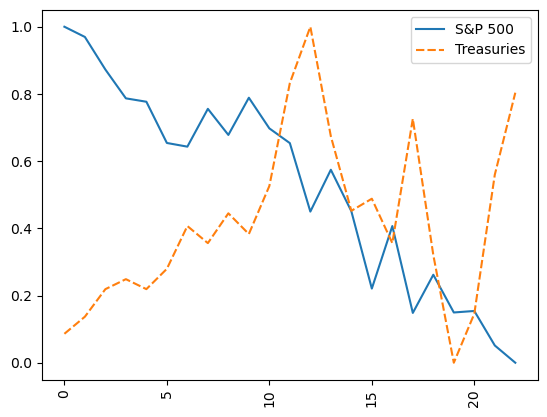

In [ ]:
sns.lineplot(data=Market2020)
plt.xticks(rotation=90)
plt.show()

**Use Mix-Max Scaling to Normalized the Data, so that the 2022 S&P data and Treasuries data can be plotted in the same area**

In [ ]:
Market2022['S&P 500'] = (Market2022['S&P 500'] - Market2022['S&P 500'].min()) / (Market2022['S&P 500'].max() - Market2022['S&P 500'].min())
Market2022['Treasuries'] = (Market2022['Treasuries'] - Market2022['Treasuries'].min()) / (Market2022['Treasuries'].max() - Market2022['Treasuries'].min())
Market2022.head()

,Date,S&P 500,Treasuries
0,2022-01-04,1.000000,0.988652
1,2022-01-05,0.924209,0.973391
2,2022-01-06,0.920572,0.980630
3,2022-01-07,0.905281,0.960477
4,2022-01-10,0.900488,0.967325


**Plot the normalized data so 2022 S&P 500 and Treasuries can be compared visually**

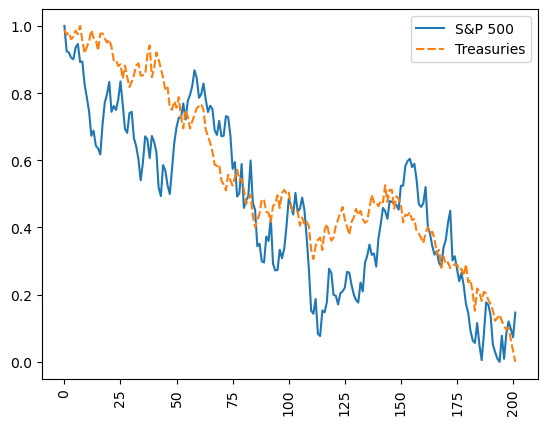

In [ ]:
sns.lineplot(data=Market2022)
plt.xticks(rotation=90)
plt.show()